# Mucking around with exponential curves...

We'll take a look at using a negative  our spore dispersal using an [natural] exponential curve, which [Galante et al.](http://www.tandfonline.com/doi/full/10.3852/10-388) found useful for describing spore concentrations from a mushroom. 

In [36]:
from sympy import symbols
from sympy.plotting import plot
from sympy import exp, ln
import matplotlib.pyplot as plt
import math 
%matplotlib inline

In [3]:
x  = symbols('x')

In [35]:
s = plot(exp(-0.5*x), line_color='Purple', ylim=(0,1), xlim=(0,15))
t = plot(exp(-1.0*x), line_color='Green', ylim=(0,1), xlim=(0,15))
u = plot(exp(-2*x), line_color='Blue', ylim=(0,1), xlim=(0,15))
v = plot(exp(-4*x), line_color='Red', ylim=(0,1), xlim=(0,15))

s.extend(t);s.extend(u);s.extend(v)
s.legend = True

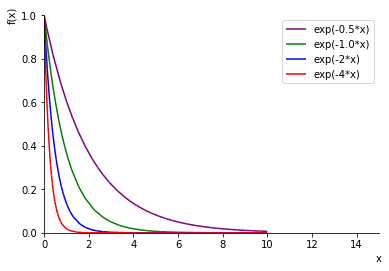

In [36]:
s.show()

Some very simple things to notice here. One convenient fact is that all exponential curves with a negative coefficient go to the asymptote of zero when distance is great, and to 1 when distance is very small, because any real number taken to the 0-th power is 1. The negative exponential functions approximate what we see in nature very well, high probability-of-infection/high spore numbers close to a source, with a long tail of few, but well-dispersed spores at longer distances. 

If we write this function with a dispersal ('D') coefficient, it looks like this: 

\begin{equation*}
f(x)   =  e^{-Dx}
\end{equation*}

When a fungus is well-dispersed (many small spores well ejected from a sporocarp), we give it a small value, and when the opposite is true, we'll give in a high value. In the above diagram, the purple fungus is well-dispersed, it has a small D value, D=0.5. The red fungus is poorly dispersed, D=4. 

Given this, it may be more convenient to use the additive inverse of D as a parameter on the model, so that we are working with positive numbers. And the multiplicative inverse (the reciprocal), so that magnitudes of our dispersal coefficient will correlate with number-of-spores/probability-of-infection. In this way, for instance, at a distance of one unit, a dispersal coefficient of five gives a greater probability of infection  than 2:


\begin{equation*}
f(x) = e^{\frac{-1}{d}x}
\end{equation*}

\begin{equation*}
f(5)   =  e^{(\frac{-1}{5})(1)}    = 0.82
\end{equation*}

\begin{equation*}
f(2)   =  e^{(\frac{-1}{2})(1)}    = 0.61
\end{equation*}

Let's code our plot in pyplot to reflect this:

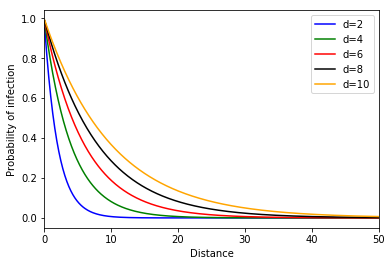

In [31]:
d = 10
cls = ['b','g','r','k','orange']
x = [ i/10 for i in range(1,1001,1) ] ## 1 to 1000
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0,50]) 
for j in range(2,d+1,2):
    y = [ exp((-1/j)*i) for i in x ]
    ax.plot(x,y,
            color=cls[int(j/2-1)],
            label=('d=%s' %j),
            )

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel("Distance")
ax.set_ylabel("Probability of infection")


This is a little confusing, because we don't have meters on the x-axis. We just have some abstract distance unit.

So as far as our model landscape, which is trying to be a 1 km <sup>2</sup> plot, each cell is 10 m by 10 m. That means each unit on the x-axis of this plot represents 10 meters. Does this make sense? We can explore some real data to check this. 

We know that under the set of conditions that we will be using for our model runs, a fungus with d=5 can persist fairly well on the landscape (though far from 100% of runs). In the above figure, we see that the likelihood of infection by fungi with d=4 (green) goes to zero somewhere around 20 distance-units, or 200 m. For fungi with d=6 (red), zero happens maybe around 300 meters. How does this compare with real data? 

One good study to use here is [Norros et al. (2012)](http://onlinelibrary.wiley.com/doi/10.1111/j.1600-0706.2012.20052.x/full). They placed cultures of monokaryons of a rare basidiomycete at increasing distances from point sources of spores (sporocarps), and checked frequency/probability of a compatible mating event, as evidenced by formation of clamp connections. 

Here is one figure of some of their results:

<img src='graphics/norros.png'>

Notice that probability of infection drops off quickly (x-axis is sort of log-transformed), is very low in the 400-1000 m range (though not zero!). While not a perfect fit to our negative exponential functions, we seems like we're in the right order of magnitude. Compared to the above, d=5 is actually pretty conservative, we might expect to seem something closer to d=10 or even d=15. Something to think about as we run our models, but also worth noting that this method of detecting spores is not quite a complete measure of successful establishment - successful inocculation of woody substrates by a fungus will probably be much more  difficult than acceptance of a spore by known compatible strain of monokaryon mycelium.  

This also informs our calibration of leaf dispersals in the model. According to Roo's data, leaf fall at Los Cedros from two canopy trees also resembled some sort of exponential decay:

<img src='graphics/fallenleaves.png'>

Not going to try to fit a model to this, but for the purposes of roughly calibrating our model, most leaf deposition zeroes out around 25 or 30 meters, and the vast majority of the leaves fall within 10 m (1-3 distance units on the above figure of dispersal curves). Thus we might start by assigning a dispersal value of d=1 to trees. 

There are some large assumptions in this - that wood deposited under an endophyte-infected tree will have a 100% chance of being inocculated by those endophytes, for instance. We know very little about the chance of success of establishment of mycelium in wood from an endophyte-infected leaf, though we know it is possible and we have argued that it might be enhanced in some ways over spore-to-wood inocculations. 

Perhaps we should handicap probabilities of leaf dispersal a little. I wouldn't say that a log under a tree should have a 100% infection probability from endophytes in leaves, intuitively. On the other hand, leaves from the overhead tree create significant litter cover, sometimes 100%. And all of those leaves contain endophytes, competent or not. 

In [57]:
math.exp(-0/1)

1.0

In [52]:
math.exp(-1/2)

0.6065306597126334